<a href="https://colab.research.google.com/github/skl30misha/data-science-projects-/blob/main/MCDM-Projects/ERP_Supplier_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Develop a decision-support tool for selecting the most suitable supplier using the AHP (Analytic Hierarchy Process) method.
Each supplier is evaluated based on 10 criteria such as price, reliability, quality, and eco-friendliness.
Some criteria are meant to be maximized (e.g., quality), while others are minimized (e.g., price).
Goal:
Automate the supplier evaluation and ranking process by incorporating AHP-based weights.
The output ranks all suppliers and highlights the top candidate for partnership based on a weighted score.

# Connection


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/MCDM-Projects/ERP_Supplier_Optimizer')

Mounted at /content/drive


# Import

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supplier Scoring and Ranking using AHP

In [4]:
# Load the Excel file
df = pd.read_excel("ahp.xlsx")

# Check the structure of the DataFrame
print(df.info())
print(df.describe())
print(df.shape)

# Define weights for each criterion (from AHP)
weights = {
    'Supplier Reliability (Score)': 0.2246,
    'Warranty Period (Months)': 0.1595,
    'Unit Price (UAH)': 0.1593,
    'Product Quality (Score)': 0.1334,
    'Delivery Speed (Days)': 0.1078,
    'Market Reputation (Score)': 0.0634,
    'Payment Flexibility (Score)': 0.0576,
    'Customer Rating (Score)': 0.0446,
    'Rejection Rate (%)': 0.0307,
    'Eco-Friendliness (Score)': 0.0191
}

# Define criteria to maximize and minimize
maximize = [
    'Product Quality (Score)',
    'Supplier Reliability (Score)',
    'Payment Flexibility (Score)',
    'Eco-Friendliness (Score)',
    'Warranty Period (Months)',
    'Customer Rating (Score)',
    'Market Reputation (Score)'
]

minimize = [
    'Unit Price (UAH)',
    'Delivery Speed (Days)',
    'Rejection Rate (%)'
]

# Normalize the data
df_norm = df.copy()
for col in maximize:
    df_norm[col] = df[col] / df[col].max()
for col in minimize:
    df_norm[col] = df[col].min() / df[col]

# Calculate the overall AHP score
df_norm['AHP Score'] = sum(df_norm[col] * weights[col] for col in weights)

# Sort suppliers by score
df_sorted = df_norm.sort_values(by='AHP Score', ascending=False).reset_index(drop=True)

# Print ranked list of suppliers
print("Supplier ranking:")
print(df_sorted[['Supplier', 'AHP Score']])
# Print the best supplier
print("\nTop supplier:")
print(df_sorted[['Supplier', 'AHP Score']].iloc[0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Supplier                      10 non-null     object 
 1   Unit Price (UAH)              11 non-null     float64
 2   Product Quality (Score)       10 non-null     float64
 3   Supplier Reliability (Score)  10 non-null     float64
 4   Delivery Speed (Days)         10 non-null     float64
 5   Payment Flexibility (Score)   10 non-null     float64
 6   Eco-Friendliness (Score)      10 non-null     float64
 7   Warranty Period (Months)      10 non-null     float64
 8   Customer Rating (Score)       10 non-null     float64
 9   Rejection Rate (%)            10 non-null     float64
 10  Market Reputation (Score)     10 non-null     float64
 11  AHP Score                     10 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.2+ KB
None
       Unit P

# Visualize the ranking

<ipython-input-5-376a55b79353>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="AHP Score", y="Supplier", palette="Blues_d")


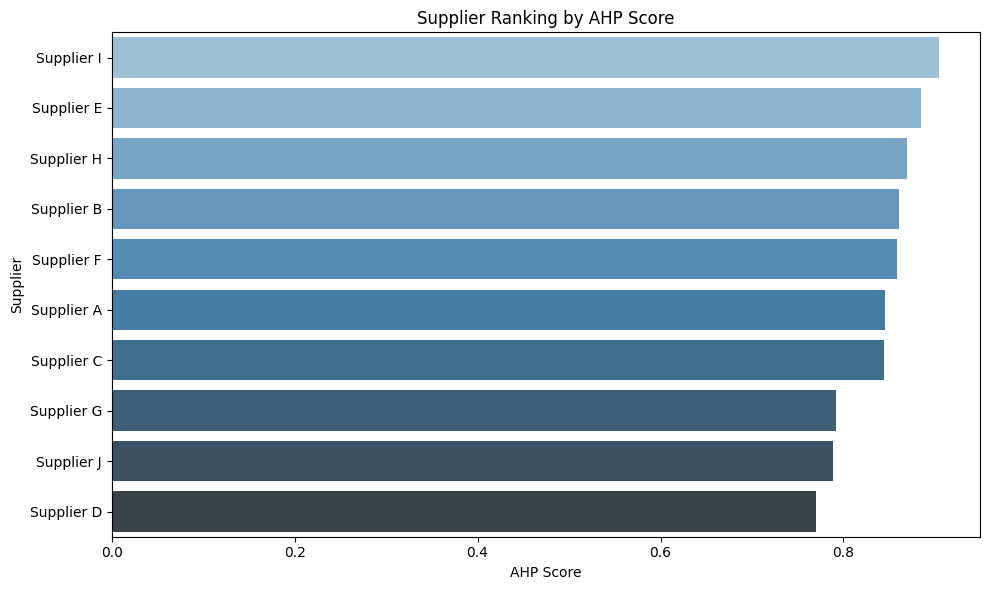

In [5]:
# Visualize the ranking
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="AHP Score", y="Supplier", palette="Blues_d")
plt.title("Supplier Ranking by AHP Score")
plt.xlabel("AHP Score")
plt.ylabel("Supplier")
plt.tight_layout()
plt.show()

# Result

The decision-support tool successfully evaluated and ranked all suppliers using AHP-based weighted scoring.
The supplier with the highest AHP Score is selected as the most suitable candidate for partnership.
